In [76]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [77]:
IMAGE_SIZE = [224, 224]

train_data_path = 'assets/train'
test_data_path = 'assets/test'

In [78]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')

In [79]:
resnet.summary()

n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [80]:
for layer in resnet.layers:
  layer.trainable = False

In [81]:
folders = glob('assets/train/*')
print(folders)

['assets/train/lamborghini', 'assets/train/audi', 'assets/train/mercedes']


In [82]:
x = Flatten()(resnet.output)

In [83]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [84]:
model.summary()

0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [87]:
training_set = training_gen.flow_from_directory('assets/train', class_mode='categorical', target_size=(224, 224), batch_size=32)

test_set = test_gen.flow_from_directory('assets/test', class_mode='categorical', target_size=(224, 224), batch_size=32)

Found 117 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [88]:
result = model.fit_generator(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/50
4/4 [==============================] - 10s 2s/step - loss: 8.2857 - accuracy: 0.3333 - val_loss: 8.4993 - val_accuracy: 0.3455
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 5.0516 - accuracy: 0.3333 - val_loss: 3.8585 - val_accuracy: 0.3455
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 4.0547 - accuracy: 0.3162 - val_loss: 3.2692 - val_accuracy: 0.3455
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 3.3435 - accuracy: 0.3077 - val_loss: 2.6534 - val_accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 1.8280 - accuracy: 0.4872 - val_loss: 3.2234 - val_accuracy: 0.3091
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 1.8209 - accuracy: 0.4786 - val_loss: 2.2030 - val_accuracy: 0.4182
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 1.5079 - accuracy: 0.4957 - val_loss: 1.7200 - val_accuracy: 0.4000
Epoch 8/50
4/4 [========================

In [89]:
result.history

{'loss': [8.285722732543945,
  5.051609516143799,
  4.054669380187988,
  3.3434598445892334,
  1.8280200958251953,
  1.820924162864685,
  1.5078980922698975,
  1.1822617053985596,
  0.9877507090568542,
  0.962584912776947,
  0.820831298828125,
  0.7992705702781677,
  0.8136311173439026,
  0.7943940758705139,
  0.9032390713691711,
  0.7596378922462463,
  0.6729341149330139,
  0.7749444246292114,
  0.723625898361206,
  0.5479881167411804,
  0.49399957060813904,
  0.490109920501709,
  0.6318764686584473,
  0.6226708889007568,
  0.6041849255561829,
  0.5813122391700745,
  0.5339770317077637,
  0.46366214752197266,
  0.5156856775283813,
  0.5557031631469727,
  0.4910828471183777,
  0.44013747572898865,
  0.41649216413497925,
  0.43265676498413086,
  0.4748404622077942,
  0.4547104239463806,
  0.3690122961997986,
  0.39385169744491577,
  0.37835416197776794,
  0.3218182921409607,
  0.33613428473472595,
  0.4104580879211426,
  0.3781472146511078,
  0.5691227316856384,
  0.3933790922164917,
  

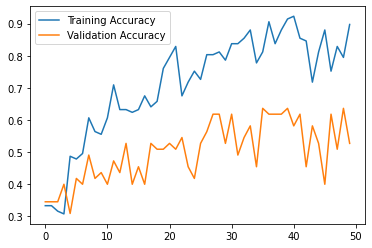

In [90]:
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

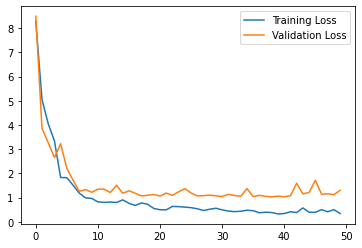

In [91]:
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [92]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [93]:
predictions = model.predict(test_set)

print(predictions)

[[1.77680761e-01 7.08313137e-02 7.51487911e-01]
 [1.49212277e-03 9.09415603e-01 8.90921801e-02]
 [3.44446227e-02 1.87884063e-01 7.77671278e-01]
 [5.28190956e-02 1.17829097e-02 9.35397983e-01]
 [6.37449324e-02 3.41484308e-01 5.94770789e-01]
 [3.01092023e-05 1.03119947e-02 9.89657938e-01]
 [1.24298036e-02 1.26164764e-01 8.61405432e-01]
 [7.70102024e-01 3.83358933e-02 1.91562161e-01]
 [3.02546117e-02 6.01634622e-01 3.68110836e-01]
 [6.60821870e-02 4.62458789e-01 4.71459001e-01]
 [5.70875823e-01 1.01480410e-02 4.18976188e-01]
 [2.39515603e-02 1.18264645e-01 8.57783794e-01]
 [4.22909334e-02 1.26875654e-01 8.30833435e-01]
 [6.06842106e-03 2.65164040e-02 9.67415214e-01]
 [1.39415428e-01 1.53626829e-01 7.06957757e-01]
 [4.57839444e-02 3.34998779e-02 9.20716166e-01]
 [5.51801585e-02 7.59188682e-02 8.68900955e-01]
 [8.36078729e-03 2.64371559e-03 9.88995433e-01]
 [1.67748973e-01 2.32648760e-01 5.99602342e-01]
 [6.50026351e-02 4.33522046e-01 5.01475334e-01]
 [8.13999400e-02 4.26214874e-01 4.923851

In [94]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred)

[2 1 2 2 2 2 2 0 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 0 1
 0 1 2 0 2 2 2 0 0 2 1 1 1 0 2 2 2 2]


In [105]:
### EXAMPLE

In [303]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('model_resnet50.h5')

In [304]:
# img = image.load_img('assets/train/audi/76.jpeg', target_size=(224, 224))
# img.show()

In [305]:
for i in range(8, 26):
    img = image.load_img('assets/train/mercedes/{}.jpg'.format(i), target_size=(224, 224))
    x = image.img_to_array(img)
    x = x/255
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    prediction = model.predict(img_data)
    ans = np.argmax(prediction, axis=1)
    print('{} : '.format(i), end = "")
    if ans == 0:
        print("Audi")
    elif ans == 1:
        print("Lamborghini")
    elif ans == 2:
        print("Mercedes")

8 : Lamborghini
9 : Lamborghini
10 : Mercedes
11 : Lamborghini
12 : Lamborghini
13 : Mercedes
14 : Lamborghini
15 : Lamborghini
16 : Lamborghini
17 : Mercedes
18 : Lamborghini
19 : Lamborghini
20 : Lamborghini
21 : Lamborghini
22 : Lamborghini
23 : Lamborghini
24 : Lamborghini
25 : Lamborghini


In [306]:
x = image.img_to_array(img)

In [307]:
x.shape

(224, 224, 3)

In [308]:
x = x/255

In [309]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [310]:
prediction = model.predict(img_data)
prediction

array([[0.00345205, 0.8166303 , 0.17991762]], dtype=float32)

In [311]:
ans = np.argmax(prediction, axis=1)

In [312]:
if ans == 0:
    print("Audi")
elif ans == 1:
    print("Lamborghini")
elif ans == 2:
    print("Mercedes")

Lamborghini
